# Livro para consulta:
- https://jakevdp.github.io/PythonDataScienceHandbook/03.08-aggregation-and-grouping.html
- https://jakevdp.github.io/PythonDataScienceHandbook/03.09-pivot-tables.html
    

# 1. Importando bibliotecas <a name="import"></a>

<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

# 2. Carregando o dataframe SINASC <a name="read"></a>
<div style="text-align: right"
     
[Voltar ao índice](#Contents)

In [2]:
sinasc_raw = pd.read_csv('SINASC_RO_2019.csv')
sinasc_raw.head()

,ORIGEM,CODESTAB,CODMUNNASC,LOCNASC,IDADEMAE,ESTCIVMAE,ESCMAE,CODOCUPMAE,QTDFILVIVO,QTDFILMORT,...,KOTELCHUCK,CONTADOR,munResStatus,munResTipo,munResNome,munResUf,munResLat,munResLon,munResAlt,munResArea
0,1,2679477.0,110001,1,19,5.0,8 a 11 anos,NaN,0.0,0.0,...,5,1,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
1,1,2679477.0,110001,1,29,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,2,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
2,1,2679477.0,110001,1,37,9.0,8 a 11 anos,513205.0,2.0,0.0,...,5,3,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025
3,1,2516500.0,110001,1,30,5.0,12 anos ou mais,231205.0,0.0,0.0,...,4,4,ATIVO,MUNIC,Alto Alegre dos Parecis,Rondônia,-12.13178,-61.85308,397.0,3958.273
4,1,2516500.0,110001,1,30,2.0,8 a 11 anos,999992.0,1.0,0.0,...,5,5,ATIVO,MUNIC,Alta Floresta D'Oeste,Rondônia,-11.93554,-61.99982,338.0,7067.025


In [3]:
sinasc_raw.select_dtypes(include=['number']).head().columns
        

Index(['ORIGEM', 'CODESTAB', 'CODMUNNASC', 'LOCNASC', 'IDADEMAE', 'ESTCIVMAE',
       'CODOCUPMAE', 'QTDFILVIVO', 'QTDFILMORT', 'CODMUNRES', 'CONSULTAS',
       'HORANASC', 'APGAR1', 'APGAR5', 'PESO', 'IDANOMAL', 'NUMEROLOTE',
       'DIFDATA', 'DTRECORIGA', 'NATURALMAE', 'CODMUNNATU', 'CODUFNATU',
       'ESCMAE2010', 'SERIESCMAE', 'DTNASCMAE', 'RACACORMAE', 'QTDGESTANT',
       'QTDPARTNOR', 'QTDPARTCES', 'IDADEPAI', 'DTULTMENST', 'SEMAGESTAC',
       'TPMETESTIM', 'CONSPRENAT', 'MESPRENAT', 'TPAPRESENT', 'STTRABPART',
       'STCESPARTO', 'TPNASCASSI', 'TPFUNCRESP', 'TPDOCRESP', 'DTDECLARAC',
       'ESCMAEAGR1', 'STDNEPIDEM', 'STDNNOVA', 'CODPAISRES', 'TPROBSON',
       'PARIDADE', 'KOTELCHUCK', 'CONTADOR', 'munResLat', 'munResLon',
       'munResAlt', 'munResArea'],
      dtype='object')

In [4]:
sinasc_raw['PESO'].info()

<class 'pandas.core.series.Series'>
RangeIndex: 27028 entries, 0 to 27027
Series name: PESO
Non-Null Count  Dtype
--------------  -----
27028 non-null  int64
dtypes: int64(1)
memory usage: 211.3 KB


# Tarefa 2

### 1. Crie 2 faixas de Latitude do município (munResLat) sendo uma acima e outra abaixo de -10.5 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [5]:
sinasc_1 = sinasc_raw[['munResLat','munResArea','QTDGESTANT']].copy()
sinasc_1

,munResLat,munResArea,QTDGESTANT
0,-11.93554,7067.025,0.0
1,-11.93554,7067.025,1.0
2,-11.93554,7067.025,2.0
3,-12.13178,3958.273,0.0
4,-11.93554,7067.025,1.0
...,...,...,...
27023,-12.74137,11518.915,1.0
27024,-12.55684,5126.723,0.0
27025,-12.74137,11518.915,1.0
27026,-12.74137,11518.915,1.0


In [6]:
dados = sinasc_1['munResLat'].unique()
df = pd.DataFrame(dados, index = None)

In [7]:
df.sort_values(by=0)
df.to_excel('latitude.xlsx', 'Sheet1', index=False, header=False)

In [8]:
classe_latitude = {
-13.49976:"acima",
-13.47656:"acima",
-13.19503:"acima",
-13.13056:"acima",
-12.99752:"acima",
-12.74137:"acima",
-12.55684:"acima",
-12.43601:"acima",
-12.17983:"acima",
-12.13178:"acima",
-12.0638:"acima",
-11.93554:"acima",
-11.91439:"acima",
-11.90842:"acima",
-11.82571:"acima",
-11.76712:"acima",
-11.72226:"acima",
-11.72133:"acima",
-11.70974:"acima",
-11.69949:"acima",
-11.67754:"acima",
-11.52855:"acima",
-11.43387:"acima",
-11.42684:"acima",
-11.34413:"acima",
-11.19624:"acima",
-11.17321:"acima",
-11.12855:"acima",
-11.04561:"acima",
-10.93217:"acima",
-10.91553:"acima",
-10.88205:"acima",
-10.77388:"acima",
-10.72357:"acima",
-10.61207:"acima",
-10.56842:"acima",
-10.43595:"abaixo",
-10.43105:"abaixo",
-10.41177:"abaixo",
-10.33887:"abaixo",
-10.2631:"abaixo",
-10.24873:"abaixo",
-10.20981:"abaixo",
-9.90846:"abaixo",
-9.85139:"abaixo",
-9.71667:"abaixo",
-9.70554:"abaixo",
-9.42556:"abaixo",
-9.37819:"abaixo",
-9.19187:"abaixo",
-8.78502:"abaixo",
-8.76889:"abaixo"
}

In [9]:
sinasc_1 = sinasc_1.set_index('munResLat')
sinasc_1.groupby(classe_latitude).sum()

,munResArea,QTDGESTANT
munResLat,,
abaixo,3.137711e+08,17615.0
acima,8.360143e+07,15301.0


In [10]:
sinasc_1.groupby(classe_latitude).mean()

,munResArea,QTDGESTANT
munResLat,,
abaixo,22357.926110,1.364024
acima,6434.344207,1.186032


In [11]:
sinasc_1.groupby(classe_latitude).min()

,munResArea,QTDGESTANT
munResLat,,
abaixo,965.676,0.0
acima,459.978,0.0


In [12]:
sinasc_1.groupby(classe_latitude).max()

,munResArea,QTDGESTANT
munResLat,,
abaixo,34096.394,52.0
acima,24855.724,15.0


In [13]:
sinasc_1.groupby(classe_latitude).median()

,munResArea,QTDGESTANT
munResLat,,
abaixo,34096.394,1.0
acima,5067.384,1.0


In [14]:
sinasc_1.groupby(classe_latitude).std()

,munResArea,QTDGESTANT
munResLat,,
abaixo,14488.909375,1.492482
acima,5688.822159,1.304777


In [15]:
sinasc_1.groupby(classe_latitude).var()

,munResArea,QTDGESTANT
munResLat,,
abaixo,2.099285e+08,2.227501
acima,3.236270e+07,1.702444


### 2. Crie 2 faixas da área dos municípios (munResArea) sendo uma acima e outra abaixo de 3000 e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [16]:
sinasc_2 = sinasc_raw[['munResArea','QTDFILVIVO','QTDFILMORT']].copy()
dados_2 = sinasc_2['munResArea'].unique()

In [17]:
area = {}
for item in dados_2:
    if item < 3000:
        classe = 'abaixo'
    else:
        classe = 'acima'
    area.update({ item : classe })
    
print(area)

{7067.025: 'acima', 3958.273: 'acima', 843.446: 'abaixo', 1457.888: 'abaixo', 541.647: 'abaixo', 4426.571: 'acima', 3863.943: 'acima', 2651.822: 'abaixo', 1931.378: 'abaixo', 2944.128: 'abaixo', 1717.64: 'abaixo', 34096.394: 'acima', 1961.778: 'abaixo', 4081.583: 'acima', 6896.648: 'acima', 3265.809: 'acima', 11518.915: 'acima', 3135.106: 'acima', 6843.868: 'acima', 4987.177: 'acima', 3442.005: 'acima', 8509.27: 'acima', 1451.06: 'abaixo', 10071.643: 'acima', 831.857: 'abaixo', 1969.85: 'abaixo', 3060.321: 'acima', 7460.219: 'acima', 5067.384: 'acima', 1197.796: 'abaixo', 6240.932: 'acima', 1191.875: 'abaixo', 2783.3: 'abaixo', 1758.465: 'abaixo', 3792.998: 'acima', 2548.683: 'abaixo', 4518.035: 'acima', 10959.767: 'acima', 798.083: 'abaixo', 1703.008: 'abaixo', 3029.189: 'acima', 605.692: 'abaixo', 3773.505: 'acima', nan: 'acima', 892.842: 'abaixo', 5126.723: 'acima', 24855.724: 'acima', 2197.413: 'abaixo', 807.126: 'abaixo', 459.978: 'abaixo', 965.676: 'abaixo', 6014.733: 'acima', 13

In [18]:
sinasc_2 = sinasc_2.set_index('munResArea')
sinasc_2.groupby(area).sum()

,QTDFILVIVO,QTDFILMORT
munResArea,,
abaixo,4773.0,1260.0
acima,22053.0,5383.0


In [19]:
sinasc_2.groupby(area).mean()

,QTDFILVIVO,QTDFILMORT
munResArea,,
abaixo,0.924284,0.244803
acima,1.086890,0.272116


In [20]:
sinasc_2.groupby(area).min()

,QTDFILVIVO,QTDFILMORT
munResArea,,
abaixo,0.0,0.0
acima,0.0,0.0


In [21]:
sinasc_2.groupby(area).max()

,QTDFILVIVO,QTDFILMORT
munResArea,,
abaixo,30.0,4.0
acima,14.0,28.0


In [22]:
sinasc_2.groupby(area).median()

,QTDFILVIVO,QTDFILMORT
munResArea,,
abaixo,1.0,0.0
acima,1.0,0.0


In [23]:
sinasc_2.groupby(area).std()

,QTDFILVIVO,QTDFILMORT
munResArea,,
abaixo,1.075442,0.551215
acima,1.191750,0.629081


In [24]:
sinasc_2.groupby(area).var()

,QTDFILVIVO,QTDFILMORT
munResArea,,
abaixo,1.156575,0.303838
acima,1.420268,0.395743


### 3. Determine faixas na variável munResAlt e aplique o groupby usando essas faixas como chave e realize operações de soma, media, minimo, maximo, mediana, desvio padrao, variancia pra pelo menos 2 variáveis numéricas ainda não utilizadas

In [25]:
sinasc_3 = sinasc_raw[['munResAlt','QTDFILVIVO','QTDFILMORT']].copy()
dados_3 = sinasc_3['munResAlt'].unique()
sinasc_3['munResAlt'].describe()

count    27027.000000
mean       179.111999
std        123.138365
min         85.000000
25%         87.000000
50%        153.000000
75%        191.000000
max        595.000000
Name: munResAlt, dtype: float64

In [26]:
altitude = {}
for item in dados_3:
    if item <= 85:
        classe = 'muito baixo'
    elif item <= 153:
        classe = 'baixo'
    elif item <= 191:
        classe = 'alto'
    else:
        classe = 'muito alto'
    altitude.update({ item : classe })
    
print(altitude)

{338.0: 'muito alto', 397.0: 'muito alto', 230.0: 'muito alto', 227.0: 'muito alto', 270.0: 'muito alto', 139.0: 'baixo', 111.0: 'baixo', 128.0: 'baixo', 155.0: 'alto', 163.0: 'alto', 124.0: 'baixo', 87.0: 'baixo', 161.0: 'alto', 99.0: 'baixo', 157.0: 'alto', 153.0: 'baixo', 595.0: 'muito alto', 158.0: 'alto', 85.0: 'muito baixo', 145.0: 'baixo', 206.0: 'muito alto', 144.0: 'baixo', 419.0: 'muito alto', 151.0: 'baixo', 197.0: 'muito alto', 252.0: 'muito alto', 269.0: 'muito alto', 191.0: 'alto', 202.0: 'muito alto', 265.0: 'muito alto', 186.0: 'alto', 212.0: 'muito alto', 263.0: 'muito alto', 178.0: 'alto', 177.0: 'alto', 296.0: 'muito alto', 166.0: 'alto', 266.0: 'muito alto', 259.0: 'muito alto', 182.0: 'alto', 245.0: 'muito alto', nan: 'muito alto', 215.0: 'muito alto', 340.0: 'muito alto', 133.0: 'baixo', 192.0: 'muito alto', 241.0: 'muito alto', 154.0: 'alto', 170.0: 'alto', 236.0: 'muito alto'}


In [27]:
sinasc_3 = sinasc_3.set_index('munResAlt')
sinasc_3.groupby(altitude).sum()

,QTDFILVIVO,QTDFILMORT
munResAlt,,
alto,6354.0,1585.0
baixo,13973.0,3429.0
muito alto,6066.0,1538.0
muito baixo,433.0,91.0


In [28]:
sinasc_3.groupby(altitude).mean()

,QTDFILVIVO,QTDFILMORT
munResAlt,,
alto,0.922608,0.230949
baixo,1.175684,0.300289
muito alto,0.950784,0.242281
muito baixo,1.433775,0.304348


In [29]:
sinasc_3.groupby(altitude).min()

,QTDFILVIVO,QTDFILMORT
munResAlt,,
alto,0.0,0.0
baixo,0.0,0.0
muito alto,0.0,0.0
muito baixo,0.0,0.0


In [30]:
sinasc_3.groupby(altitude).max()

,QTDFILVIVO,QTDFILMORT
munResAlt,,
alto,9.0,5.0
baixo,14.0,9.0
muito alto,30.0,28.0
muito baixo,8.0,5.0


In [31]:
sinasc_3.groupby(altitude).median()

,QTDFILVIVO,QTDFILMORT
munResAlt,,
alto,1.0,0.0
baixo,1.0,0.0
muito alto,1.0,0.0
muito baixo,1.0,0.0


In [32]:
sinasc_3.groupby(altitude).std()

,QTDFILVIVO,QTDFILMORT
munResAlt,,
alto,1.041525,0.534301
baixo,1.260605,0.642765
muito alto,1.079861,0.638724
muito baixo,1.520814,0.588777


In [33]:
sinasc_3.groupby(altitude).var()

,QTDFILVIVO,QTDFILMORT
munResAlt,,
alto,1.084773,0.285477
baixo,1.589126,0.413147
muito alto,1.166099,0.407968
muito baixo,2.312875,0.346659


### 4. Plote no mesmo grafico ao longo do tempo a idade media das mulheres de cada regiao imediatas de rondonia
https://pt.wikipedia.org/wiki/Lista_de_regi%C3%B5es_geogr%C3%A1ficas_intermedi%C3%A1rias_e_imediatas_de_Rond%C3%B4nia

In [34]:
sinasc_4= sinasc_raw[['IDADEMAE','DTNASC','munResNome']].copy()
sinasc_4['munResNome'].unique()

array(["Alta Floresta D'Oeste", 'Alto Alegre dos Parecis',
       'Novo Horizonte do Oeste', 'Rolim de Moura', "São Felipe D'Oeste",
       'Ariquemes', 'Cujubim', 'Alto Paraíso', 'Monte Negro', 'Jaru',
       'Rio Crespo', 'Porto Velho', 'Cacaulândia', 'Itapuã do Oeste',
       'Ji-Paraná', 'Buritis', 'Vilhena', 'Vale do Anari',
       'Candeias do Jamari', 'Costa Marques', 'Campo Novo de Rondônia',
       "Machadinho D'Oeste", 'Colorado do Oeste', 'Nova Mamoré', 'Urupá',
       'Ouro Preto do Oeste', 'Corumbiara', 'São Miguel do Guaporé',
       'Governador Jorge Teixeira', "Santa Luzia D'Oeste",
       'Pimenta Bueno', 'Mirante da Serra', 'Cerejeiras',
       'Presidente Médici', 'Cacoal', 'Parecis', "Espigão D'Oeste",
       'São Francisco do Guaporé', 'Ministro Andreazza',
       "Nova Brasilândia D'Oeste", "Alvorada D'Oeste",
       'Primavera de Rondônia', 'Seringueiras', 'Município ignorado - RO',
       'Castanheiras', 'Chupinguaia', 'Guajará-Mirim', 'Theobroma',
       'Nova 

In [35]:
porto_velho = ['Candeias do Jamari',
               'Guajará-Mirim',
               'Itapuã do Oeste',
               'Nova Mamoré',
               'Porto Velho']

ariquemes = ['Alto Paraíso',
             'Ariquemes',
             'Buritis',
             'Cacaulândia',
             'Campo Novo de Rondônia',
             ' Cujubim','Monte Negro',
             'Rio Crespo']

jaru = ["Governador Jorge Teixeira",
        "Jaru",
        "Machadinho D'Oeste",
        "Theobroma",
        "Vale do Anari"]

ji_parana = ["Alvorada D'Oeste",
             " Costa Marques",
             "Ji-Paraná",
             " Mirante da Serra",
             "Nova União",
             "Ouro Preto do Oeste",
             "Presidente Médici",
             "São Francisco do Guaporé",
             "São Miguel do Guaporé",
             "Seringueiras",
             "Teixeirópolis",
             "Urupá",
             "Vale do Paraíso"]

cacoal = ["Alta Floresta D'Oeste",
          "Alto Alegre dos Parecis",
          " Cacoal",
          "Castanheiras",
          "Espigão D'Oeste",
          "Ministro Andreazza",
          "Nova Brasilândia D'Oeste",
          "Novo Horizonte do Oeste",
          "Parecis",
          "Pimenta Bueno",
          "Primavera de Rondônia",
          "Rolim de Moura",
          "Santa Luzia D'Oeste",
          "São Felipe D'Oeste"]

vilhena = ["Cabixi",
           "Cerejeiras",
           "Chupinguaia",
           "Colorado do Oeste",
           "Corumbiara",
           "Pimenteiras do Oeste",
           " Vilhena"]

imediatas = []
for municipio in sinasc_4['munResNome']:
    if municipio in porto_velho:
        classe = 'Porto Velho'
    elif municipio in ariquemes:
        classe = 'Ariquemes'
    elif municipio in jaru:
        classe = 'Jaru'
    elif municipio in ji_parana:
        classe = 'Ji-Paraná'
    elif municipio in cacoal:
        classe = 'Cacoal'
    elif municipio in vilhena:
        classe = 'Vilhena'
    else:
        classe = 'Não localizado'   
    imediatas.append(classe)
    
print(imediatas)

['Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Ariquemes', 'Não localizado', 'Ariquemes', 'Ariquemes', 'Ariquemes', 'Ariquemes', 'Ariquemes', 'Ariquemes', 'Ariquemes', 'Ariquemes', 'Ariquemes', 'Jaru', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Cacoal', 'Ca

In [36]:
sinasc_4['REGIAO'] = imediatas
grafico = sinasc_4.pivot_table(values='IDADEMAE', index = 'DTNASC', columns ='REGIAO' )

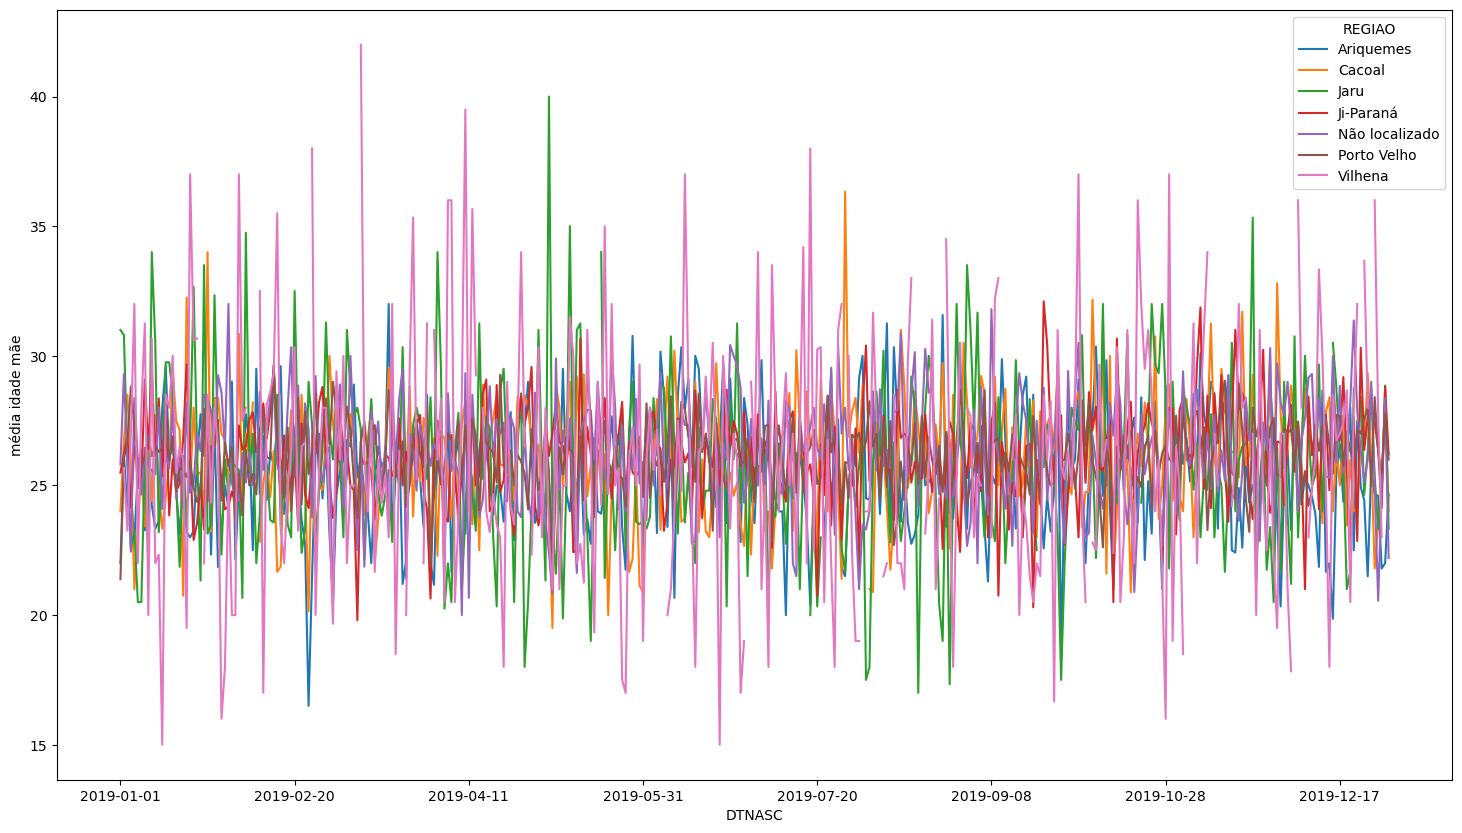

In [37]:
grafico.plot(figsize=[18, 10])
plt.ylabel('média idade mãe');

### 5. Utilize a tabela do link abaixo e crie faixas utilizando o mapping e gere agrupamentos utilizando essas faixas como chave


### 5.1 IDH
A - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IDH-M


Tarefa no notebook parte 2

### 5.2 IFDM 
B - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_IFDM


Tarefa no notebook parte 2

### 5.3 PIB
C - https://pt.wikipedia.org/wiki/Lista_de_munic%C3%ADpios_de_Rond%C3%B4nia_por_PIB


Tarefa no notebook parte 2

### Analise as respostas encontradas, tire algum insight delas, conte pra gente algo encontrado nos dados.

Exemplo:
- Ah, descobri que a idade mediana das mulheres que deram a luz no ano de 2019 dos municipios com o PIB mais alto é a maior dentre todas.

Tarefa no notebook parte 2